In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1. Set ของ Libraries ที่จำเป็น

In [0]:
# import necessary libralies
import numpy as np
import pandas as pd
import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt

## 2. การนำเข้าข้อมูล (Steady State Evoked Visually Potential) SSVEP โดยใช้ Scipy library

In [0]:
# Set Path
folder_path = '/content/drive/My Drive/SSVEP_CU_workshop/'

In [0]:
# import SSVEP datasets
subject = 20
mat_sess1 = scipy.io.loadmat(folder_path + "Datasets/sess01_subj"+str(subject).zfill(2)+"_EEG_SSVEP.mat") # ข้อมูลวันที่ 1 
mat_sess2 = scipy.io.loadmat(folder_path + "Datasets/sess02_subj"+str(subject).zfill(2)+"_EEG_SSVEP.mat") # ข้อมูลวันที่ 2 

In [5]:
# Check informations inside the matfile
mat_sess1

{'EEG_SSVEP_test': array([[(array([[[  65.59999847,   -7.30000019,   32.20000076, ...,
            64.69999695,  -20.79999924,  -13.30000019],
         [ -36.5       ,  -96.09999847,   12.39999962, ...,
            -1.29999995,   -7.19999981,   -2.0999999 ],
         [ -21.79999924,  -83.30000305,   20.        , ...,
             2.4000001 ,   25.20000076,   56.40000153],
         ...,
         [  23.29999924,  -79.09999847,   34.29999924, ...,
            32.29999924,   -7.        ,  -32.79999924],
         [  41.70000076,  -10.19999981,   24.60000038, ...,
            26.70000076,    1.29999995,   -1.10000002],
         [   5.19999981,  -17.60000038,   31.20000076, ...,
            18.29999924,   -3.4000001 ,   30.39999962]],
 
        [[  61.29999924,   -5.69999981,   19.5       , ...,
            66.        ,  -13.69999981,   -2.9000001 ],
         [ -38.        ,  -97.69999695,   12.30000019, ...,
            -4.69999981,  -13.5       ,   -6.19999981],
         [ -20.60000038,  -7

## 3. การเข้าถึงข้อมูล SSVEP ที่สนใจ

---



### ภาพรวมของข้อมูล SSVEP dataset
- ผู้เข้าร่วมทดลองจะถูกกำหนด target stimus (stimulus เปลี่ยนเป็นสีเหลือง) ใช้เวลา 4 วินาที/trial
- ผู้เข้าร่วมทดลองต้องทำการโฟกัส target stimulus เป็นเวลา 4/trial วินาที (target stimulus จะกระพริบด้วยความถี่ที่จำเพาะด้วยสีขาวสลับดำ)
- แต่ละ target stimulus จะถูกผู้เข้าร่วมโฟกัสซ้ำจำนวน 25 ครั้ง
- ดังนั้นแต่ละคนจะมีจำนวน sample (4 ความถี่ $\times$ 25 ครั้ง = 100 samples) 
- มากกว่าไปกว่านี้ ข้อมูล SSVEP ของแต่ละคน จะทั้ง offline phase (training data, 100 samples) and online phase (testing data, 100 samples)
- สุดท้ายนี้ผู้เข้าร่วมทดลองจะถูกเก็บข้อมูล SSVEP 2 วัน 

Ref: Lee, M.-H., Kwon, O.-Y., Kim, Y.-J., Kim, H.-K., Lee, Y.-E., Williamson, J., … Lee, S.-W. (2019). EEG dataset and OpenBMI toolbox for three BCI paradigms: an investigation into BCI illiteracy. GigaScience, 8(5). [link text](https://doi.org/10.1093/gigascience/giz002)

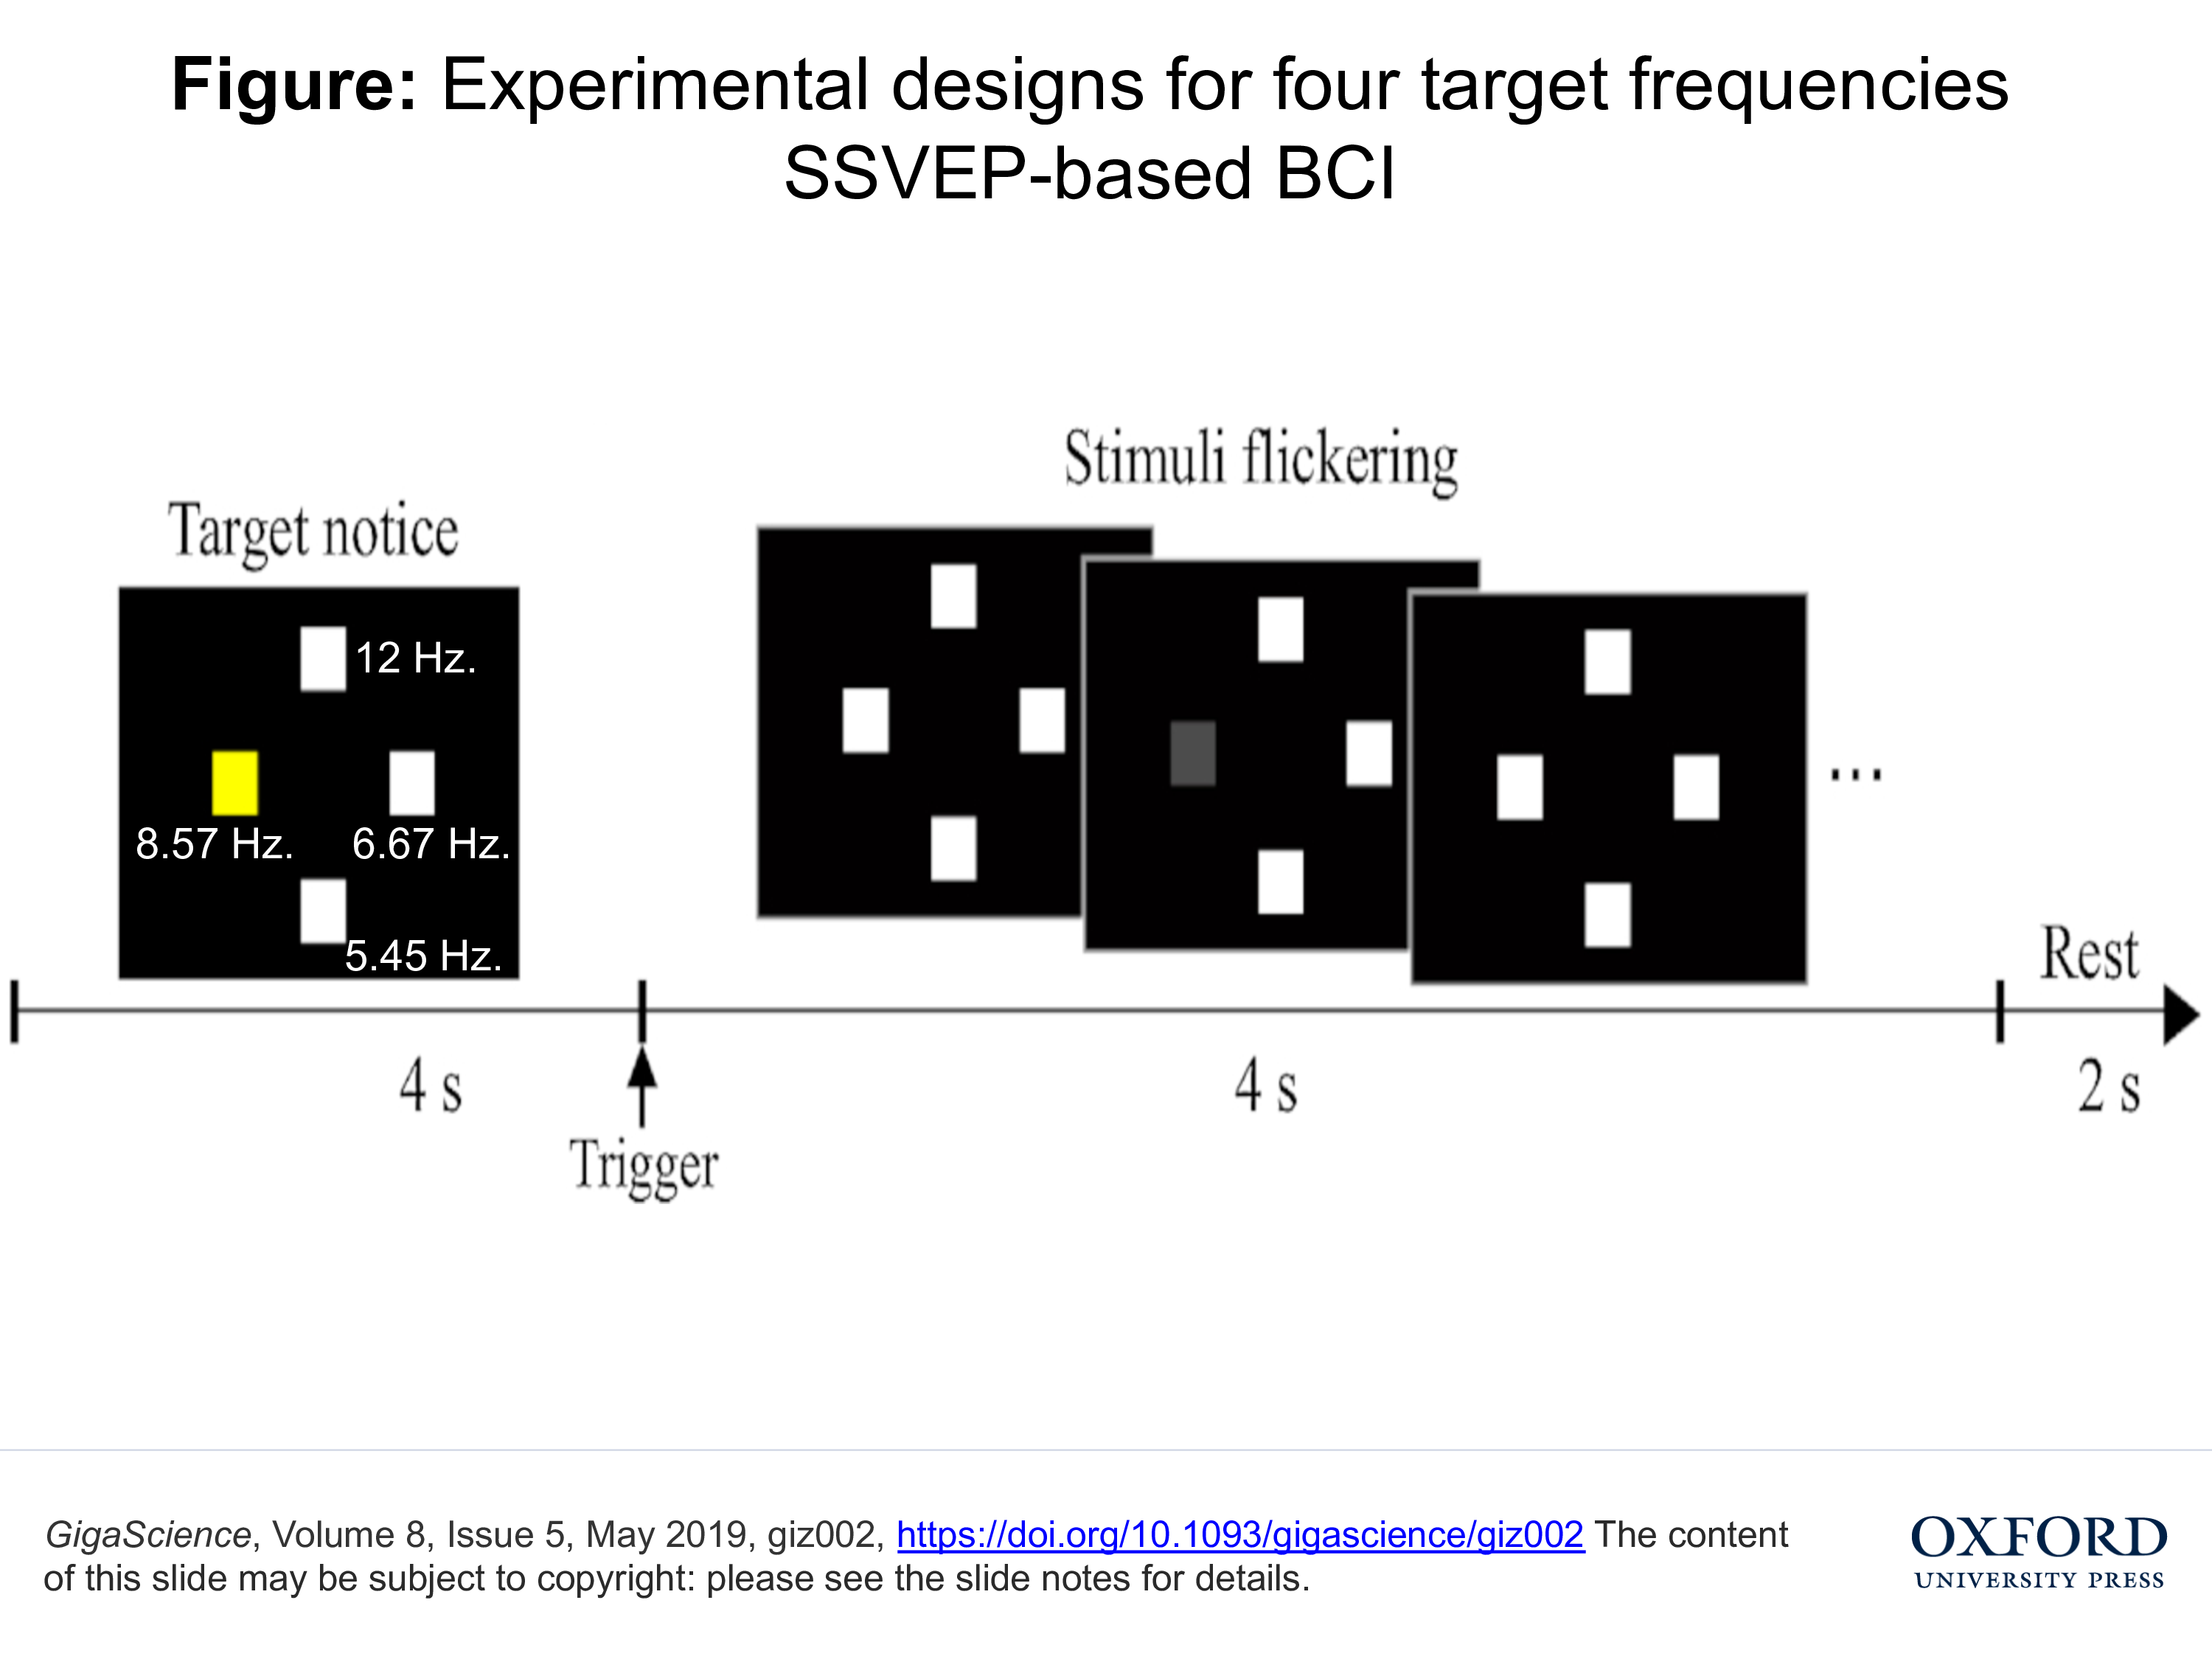

In [6]:
from IPython.display import Image
Image(folder_path+'All_picture/Four_targets_SSVEP.png', width=700)

### ตำแหน่ง electrode ที่ใช้ record สัญญาณ SSVEP

In [8]:
Image(folder_path+'All_picture/EEG_electrodes.png', width=700)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# Check ตำแหน่ง electrode จากข้อมูล SSVEP 
num_ch = np.array([ch for [ch] in mat_sess1['EEG_SSVEP_train'][0]['chan'][0][0]])
print(num_ch)
print("Note that: ตำแหน่ง electrode มีเหมือนกัน ทั้ง traing data และ testing data")

['Fp1' 'Fp2' 'F7' 'F3' 'Fz' 'F4' 'F8' 'FC5' 'FC1' 'FC2' 'FC6' 'T7' 'C3'
 'Cz' 'C4' 'T8' 'TP9' 'CP5' 'CP1' 'CP2' 'CP6' 'TP10' 'P7' 'P3' 'Pz' 'P4'
 'P8' 'PO9' 'O1' 'Oz' 'O2' 'PO10' 'FC3' 'FC4' 'C5' 'C1' 'C2' 'C6' 'CP3'
 'CPz' 'CP4' 'P1' 'P2' 'POz' 'FT9' 'FTT9h' 'TTP7h' 'TP7' 'TPP9h' 'FT10'
 'FTT10h' 'TPP8h' 'TP8' 'TPP10h' 'F9' 'F10' 'AF7' 'AF3' 'AF4' 'AF8' 'PO3'
 'PO4']
Note that: ตำแหน่ง electrode มีเหมือนกัน ทั้ง traing data และ testing data


### ตำแหน่ง electrode ที่เลือกใช้เพื่อทำการวิเคราะห์สัญญาณ SSVEP


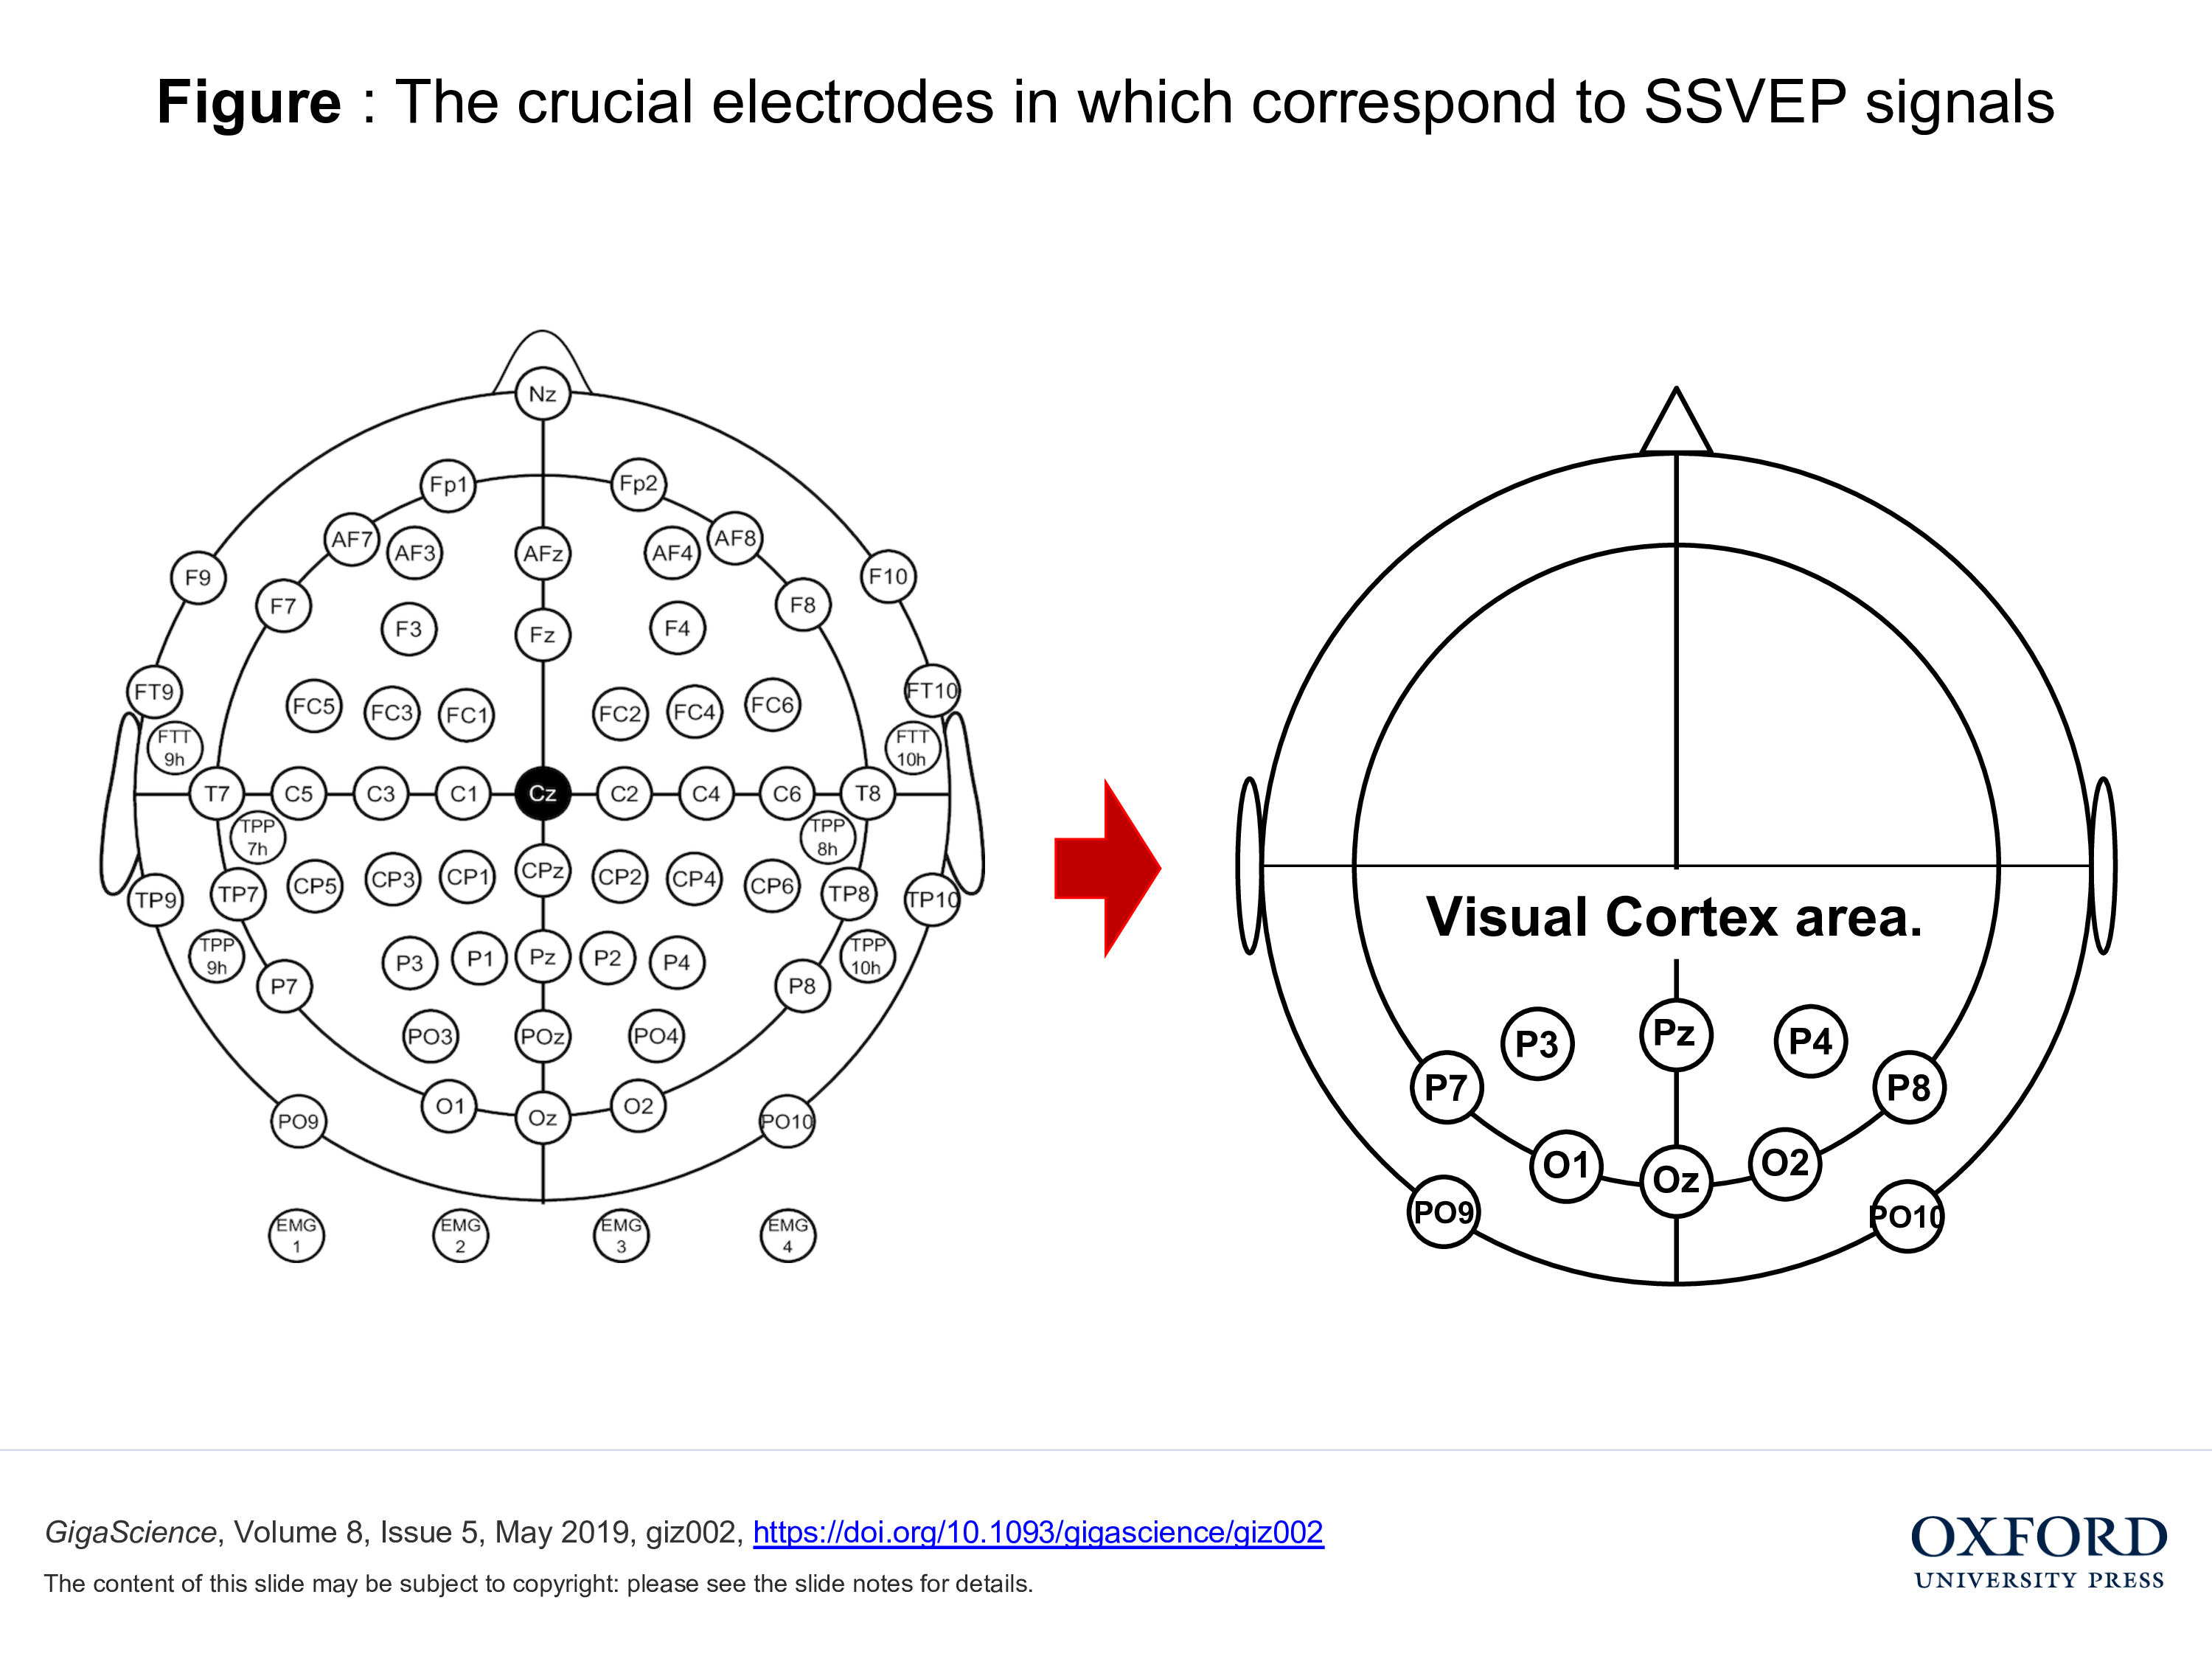

In [10]:
Image(folder_path+'All_picture/Visual_cortex.png', width=700)

In [11]:
# ตรวจสอบ index ของ electrode จากข้อมูล SSVEP 
ssvep_ch = np.array(['P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'PO10', 'O1', 'Oz', 'O2' ])
idx_ssvep_ch = []

for se_ch in ssvep_ch:
    index_ch = np.where(num_ch == se_ch)[0][0]
    idx_ssvep_ch.append(index_ch)
    print("SSVEP_channel_name:", se_ch ,"---", "Index_is:", index_ch)
print("Done")

SSVEP_channel_name: P7 --- Index_is: 22
SSVEP_channel_name: P3 --- Index_is: 23
SSVEP_channel_name: Pz --- Index_is: 24
SSVEP_channel_name: P4 --- Index_is: 25
SSVEP_channel_name: P8 --- Index_is: 26
SSVEP_channel_name: PO9 --- Index_is: 27
SSVEP_channel_name: PO10 --- Index_is: 31
SSVEP_channel_name: O1 --- Index_is: 28
SSVEP_channel_name: Oz --- Index_is: 29
SSVEP_channel_name: O2 --- Index_is: 30
Done


### 4. การ Pre-processing สัญญาณ SSVEP

### ตรวจสอบ sampling rate หรือ sampling frequency ของข้อมูล SSVEP

In [12]:
smp_freq = mat_sess1['EEG_SSVEP_train'][0]['fs'][0][0][0]
print("Sampling frequency of this SSVEP dataset is:", smp_freq, "Hz.")

Sampling frequency of this SSVEP dataset is: 1000 Hz.


### การเตรียม training data และ testing data

In [14]:
# เตรียมข้อมูล SSVEP (training set และ testing set) โดยพิจารณาเฉพาะ ตำแหน่ง electrode ที่สนใจ 
# และจัด dimesion ของข้อมูลให้อยู่ในรูปแบบ (samples, channels, time_points)

# Training data preparation session 1
tr_sess1 = mat_sess1['EEG_SSVEP_train'][0]['smt'][0] 
print("Dimension_of_raw_training_data", tr_sess1.shape)

tr_sess1 = (np.swapaxes(tr_sess1, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ training data และเลือก SSVEP electrodes
tr_sess1 = np.swapaxes(tr_sess1, 0, 1) # ทำการสลับ dimension ของ training data ครั้งสุดท้าย
print("Dimension_of_training_session1:", tr_sess1.shape)

# Training data preparation session 2
tr_sess2 = mat_sess2['EEG_SSVEP_train'][0]['smt'][0] 
print("Dimension_of_raw_training_data", tr_sess2.shape)

tr_sess2 = (np.swapaxes(tr_sess2, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ training data และเลือก SSVEP electrodes
tr_sess2 = np.swapaxes(tr_sess2, 0, 1) # ทำการสลับ dimension ของ training data ครั้งสุดท้าย
print("Dimension_of_training_session2:", tr_sess2.shape)

Dimension_of_raw_training_data (4000, 100, 62)
Dimension_of_training_session1: (100, 10, 4000)
Dimension_of_raw_training_data (4000, 100, 62)
Dimension_of_training_session2: (100, 10, 4000)


In [15]:
# Training data preparation session 1
te_sess1 = mat_sess1['EEG_SSVEP_test'][0]['smt'][0] 
print("Dimension_of_raw_testing_data", te_sess1.shape)

te_sess1 = (np.swapaxes(te_sess1, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ testing data และเลือก SSVEP electrodes
te_sess1 = np.swapaxes(te_sess1, 0, 1) # ทำการสลับ dimension ของ testing data ครั้งสุดท้าย
print("Dimension_of_testing_session1:", te_sess1.shape)

# Training data preparation session 2
te_sess2 = mat_sess2['EEG_SSVEP_test'][0]['smt'][0] 
print("Dimension_of_raw_testing_data", te_sess2.shape)

te_sess2 = (np.swapaxes(te_sess2, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ testing data และเลือก SSVEP electrodes
te_sess2 = np.swapaxes(te_sess2, 0, 1) # ทำการสลับ dimension ของ testing data ครั้งสุดท้าย
print("Dimension_of_testing_session2:", te_sess2.shape)

Dimension_of_raw_testing_data (4000, 100, 62)
Dimension_of_testing_session1: (100, 10, 4000)
Dimension_of_raw_testing_data (4000, 100, 62)
Dimension_of_testing_session2: (100, 10, 4000)


### การเตรียม label สำหรับ training data และ testing data

In [16]:
name_class = mat_sess1['EEG_SSVEP_train'][0]['class'][0]
print("Defination of class name is...")
print(name_class)

Defination of class name is...
[[array(['1'], dtype='<U1') array(['up'], dtype='<U2')]
 [array(['2'], dtype='<U1') array(['left'], dtype='<U4')]
 [array(['3'], dtype='<U1') array(['right'], dtype='<U5')]
 [array(['4'], dtype='<U1') array(['down'], dtype='<U4')]]


In [17]:
# ตัวอย่างเซตของคำตอบ (label)
print(mat_sess1['EEG_SSVEP_train'][0]['y_dec'][0][0])

[3 2 3 4 3 4 3 3 2 1 3 3 3 1 1 4 2 1 2 3 2 4 2 4 1 1 3 2 2 2 1 1 4 3 4 3 4
 4 3 3 2 2 1 2 1 4 3 1 3 1 3 1 2 1 4 3 3 4 1 1 2 4 1 2 4 1 3 3 3 2 4 2 4 4
 1 3 2 2 1 4 4 2 2 1 4 3 4 4 2 2 4 2 1 1 4 2 1 1 4 3]


In [18]:
# Label preparation
#Traing set
label_tr_sess1 = mat_sess1['EEG_SSVEP_train'][0]['y_dec'][0][0]
label_tr_sess2 = mat_sess2['EEG_SSVEP_train'][0]['y_dec'][0][0]
#Testing set
label_te_sess1 = mat_sess1['EEG_SSVEP_test'][0]['y_dec'][0][0]
label_te_sess2 = mat_sess2['EEG_SSVEP_test'][0]['y_dec'][0][0]
print("Example of labeling for training an dtesting")
print("Training_label_sess1", label_tr_sess1)
print("Testing_label_sess1", label_te_sess1)

Example of labeling for training an dtesting
Training_label_sess1 [3 2 3 4 3 4 3 3 2 1 3 3 3 1 1 4 2 1 2 3 2 4 2 4 1 1 3 2 2 2 1 1 4 3 4 3 4
 4 3 3 2 2 1 2 1 4 3 1 3 1 3 1 2 1 4 3 3 4 1 1 2 4 1 2 4 1 3 3 3 2 4 2 4 4
 1 3 2 2 1 4 4 2 2 1 4 3 4 4 2 2 4 2 1 1 4 2 1 1 4 3]
Testing_label_sess1 [3 4 4 2 2 4 3 3 2 3 3 4 4 4 1 3 2 2 1 1 4 2 2 4 2 2 3 1 3 2 2 4 2 4 1 1 2
 4 1 1 3 2 4 2 2 4 3 1 4 3 4 2 1 3 3 3 1 4 1 1 1 1 4 1 4 3 1 3 1 4 2 3 2 3
 2 3 4 3 1 1 4 2 3 3 1 2 4 2 1 3 4 3 3 1 1 2 4 1 2 4]


In [20]:
#TODO#1:รวมข้อมูลสัญญาณ SSVEP ทั้ง 2 วันเข้าด้วยกัน รวมทั้ง label คลาสของสัญญาณ # (โดยใช้ library numpy)
#################################################################################
# รวมข้อมูลสัญญาณ SSVEP ทั้ง 2 วันเข้าด้วยกัน
X_train = np.concatenate((tr_sess1, tr_sess2), axis=0)
y_train = np.concatenate((label_tr_sess1, label_tr_sess2), axis=0)

X_test = np.concatenate((te_sess1, te_sess2), axis=0)
y_test = np.concatenate((label_te_sess1, label_te_sess2), axis=0)

print("Checking dimension of both training and testing sets")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
#################################################################################
#                               END OF TODO#1                                   #
#################################################################################

Checking dimension of both training and testing sets
Training shape: (200, 10, 4000)
Testing shape: (200, 10, 4000)


### การ down-sampled สัญญาณ SSVEP จาก 1000 Hz เป็น 250 Hz.
- เนื่องจากความยาวของสัญญาณ SSVEP มีความยาว 4 วินาทีต่อsample ดังนั้นก่อนทำการ down-sampled สัญญาณ SSVEP จะมีความถี่ 1,000 Hz. (รวม 4 วินาที จะมี 4,000 จุดต่อกราฟ time series) และหลังจากทำการ down-sampled สัญญาณ SSVEP ควรจะมี 1,000 จุดต่อกราฟ time series เพื่อให้มีความถี่ของกราฟ time series เท่ากับ 250 Hz.  

In [0]:
# the necessary library
from scipy import signal

In [0]:
# ตัวอย่างการ Down-sampled โดยใช้ signal.resample
x = np.linspace(0, 10, 100, endpoint=False)
y = np.cos(-x**2/6.0)
ynew = signal.resample(y, 10)
xnew = np.linspace(0, 10, 10, endpoint=False)

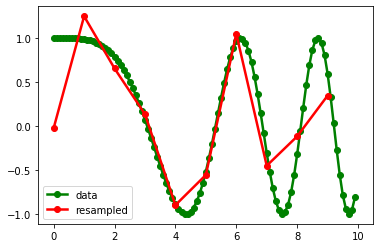

In [23]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'go-', xnew, ynew, 'ro-', 10, y[0], lw = 2.5)
plt.legend(['data', 'resampled'], loc='best')
plt.show()

In [0]:
# TODO#2: สร้าง Down-sampled function
#################################################################################
# Down-sampled function
def resampling(data, new_smp_point):
    if len(data.shape) == 3:
        data_resampled = np.zeros((data.shape[0], data.shape[1], new_smp_point))
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                data_resampled[i,j,:] = signal.resample(data[i,j,:], new_smp_point)
        print("Down sampling is finished with dimension of: ", data_resampled.shape)
        return data_resampled
    else:
        print("---Error dimension---")

#################################################################################
#                               END OF TODO#2                                   #
#################################################################################

In [27]:
# ทำการ down-sampled บน tranning set และ testing set
new_sample_point = 1000
new_smp_freq = 250
X_train_ds = resampling(X_train, new_sample_point) 
X_test_ds = resampling(X_test, new_sample_point) 

print("Validate the dimension in both of training and testing sets")
print("New shape of training set:", X_train_ds.shape)
print("New shape of testing set:", X_test_ds.shape)

Down sampling is finished with dimension of:  (200, 10, 1000)
Down sampling is finished with dimension of:  (200, 10, 1000)
Validate the dimension in both of training and testing sets
New shape of training set: (200, 10, 1000)
New shape of testing set: (200, 10, 1000)


### การคัดกรองความถี่ที่สนใจของสัญญาณ SSVEP 
- เนื่องจากสัญญาณ SSVEP ที่ได้รับจากเครื่องวัดสัญญาณสมองโดยตรงมีความถี่ของสัญญาณที่ไม่ได้สนใจปนอยู่ด้วย (Noise) โดยเฉพาะที่ 50 Hz. เป็นความถี่ของไฟบ้านทั่วไป หากไม่ทำการกรองออกสัญญาณที่ความถี่นี้จะบดบังความถี่องสัญญาณ SSVEP
- ใน workshop ครั้งนี้เราจึงจะใช้เทคคนิค Band-pass filter มากรองเอาเฉพาะช่วงความถี่ที่สนใจ โดยจะกำหนด low_cut = 4.5 Hz. , high_cut = 40 Hz. and order = 2

In [0]:
# Necessary library
from scipy.signal import butter, filtfilt

In [0]:
# Band-pass filter is one of pre-processing technique.
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

In [30]:
# ทำการัดกรองความถี่บนสัญญาณ SSVEP ให้ความถี่อยู่ในช่วง 4.5-40 Hz. 
X_train_bf = butter_bandpass_filter(X_train_ds, 4.5, 40, new_smp_freq, 2) 
X_test_bf = butter_bandpass_filter(X_test_ds, 4.5, 40, new_smp_freq, 2) 
print("Check the dimension in both of training and testing sets")
print("Shape of training set:", X_train_bf.shape)
print("Shape of testing set:", X_test_bf.shape)

Check the dimension in both of training and testing sets
Shape of training set: (200, 10, 1000)
Shape of testing set: (200, 10, 1000)


### การ visualize กราฟของสัญญาณ SSVEP ก่อน - หลัง การใช้ band-pass filter

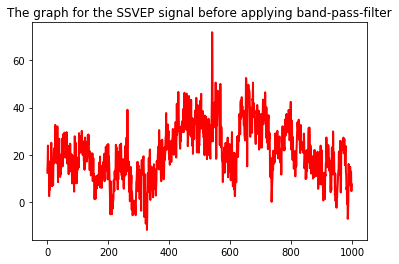

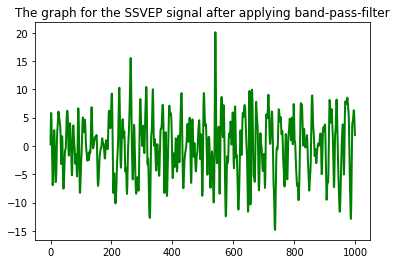

In [0]:
plt.plot(X_train_ds[0,8,:], 'r', linewidth = 2)
plt.title("The graph for the SSVEP signal before applying band-pass-filter")
plt.show()

plt.plot(X_train_bf[0,8,:], 'g', linewidth = 2)
plt.title("The graph for the SSVEP signal after applying band-pass-filter")
plt.show()

### 5. การวิเคราะห์หาความถี่ของสัญญาณ SSVEP (SSVEP frequency recognition)


**Canonical correlation analysis (CCA) ถือเป็น unsupervised learning ที่มีประสิทธิทภาพ และรวดเร็วสำหรับการตรวจหาความถี่ ดังนั้นจึงถูกนำมาใช้ในการวิเคราะห์ความถี่ของสัญญาณสมอง steady-state visual evoked potentials (SSVEP) สำหรับการเก็บสัญญาณสมองในรูปแบบ electroencephalogram (EEG)**

***การทำงานของเทคนิค CCA จะพิจารณา 2 เซตของฟังก์ชัน***
1. $\boldsymbol{X}$ คือ เซตของสัญญาณ SSVEP หลายๆ channel ที่ได้จากการวัด
2. $\boldsymbol{Y}$ คือ เซตของสัญญาณที่ถูกสร้างขึ้นจากการใช้ความถี่ของ stimulus ตัวอย่างเช่น สัญญาณ square-wave periodic ที่ถูกสร้างขึ้นโดยใช้ความถี่เดียวกับ visual stimulus นอกจากนี้ความถี่ของ visual stimulus ที่ใช้ ยังถูกแปลงไปเป็น Fourier series เพื่อให้เกิดสัญญาณที่ harmornics อื่นๆ ($\sin(2 \pi fn)$, $\cos(2 \pi fn)$, $\sin(4 \pi fn)$,...)
\begin{equation*}
    \small
    \boldsymbol{Y}_f(n)=
    \begin{bmatrix}
    \sin(2\pi
    fn)\\
    \cos(2\pi
    fn)\\
    \vdots\\
    \sin(2\pi
    N_hfn)\\
    \cos(2\pi
    N_hfn)\\
    \end{bmatrix}, \quad
    n = \frac{1}{f_s},\frac{2}{f_s},\dotsc,\frac{N_s}{f_s}
\end{equation*}
เมื่อ $f$ คือความถี่ของ visual stimulation, $N_h$ คือจำนวน harmonic, $f_s$ คือ sampling frequency
3. ทำการพิจารณาผลรวมเชิงเส้น $\boldsymbol{x} = \boldsymbol{X}^T \boldsymbol{W_X}$ และ $\boldsymbol{y} = \boldsymbol{Y}^T \boldsymbol{W_Y}$ , เมื่อ $\boldsymbol{X}$ และ $\boldsymbol{Y}$ คือฟังก์ชันหลายตัวแปร 

4. ในที่นี้ CCA จะกำหนด weight vector $\boldsymbol{W_X}, \boldsymbol{W_Y}$ และค่าความสัมพันธ์ canonical ที่มากที่สุดระหว่าง $\boldsymbol{x}$ และ $\boldsymbol{y}$ สามารถหาได้จาก:
\begin{equation}
\small
\underset{\boldsymbol{W_X},\boldsymbol{W_Y}}{\max}
{\rho(\boldsymbol{x}, \boldsymbol{y})} = 
\frac
{E \left[ \boldsymbol{W}^T_{\boldsymbol{X}} \boldsymbol{X} \boldsymbol{Y}^T \boldsymbol{W_Y} \right]}
{\sqrt{E \left[ \boldsymbol{W_X}^T\boldsymbol{XX}^T\boldsymbol{W_X}\right]\left[ \boldsymbol{W_Y}^T\boldsymbol{YY}^T\boldsymbol{W_Y}\right] }}
\end{equation} โดย maximum $\rho$ แปรผันตรงกับ $\boldsymbol{W_X}$ และ $\boldsymbol{W_Y}$ ซึ่งจะให้ผลลัพท์ที่มีค่าความสัมพันธ์ canonical ที่มากที่สุด
5. ขั้นตอนสุดท้ายทำการ voting สมมติให้เรามี stimulus frequency เท่ากับ K ความถี่ $f_1, f_2, ..., f_K$ จากนั้นเราจะเลือกความถี่ที่เหมาะสม ($f_m$) โดยพิจารณาสมการ:
\begin{equation}
\small
\boldsymbol{f_m} = \underset{\boldsymbol{f}}{\max}
{\rho({f})}, \quad {f_1, f_2, ..., f_K}
\end{equation}

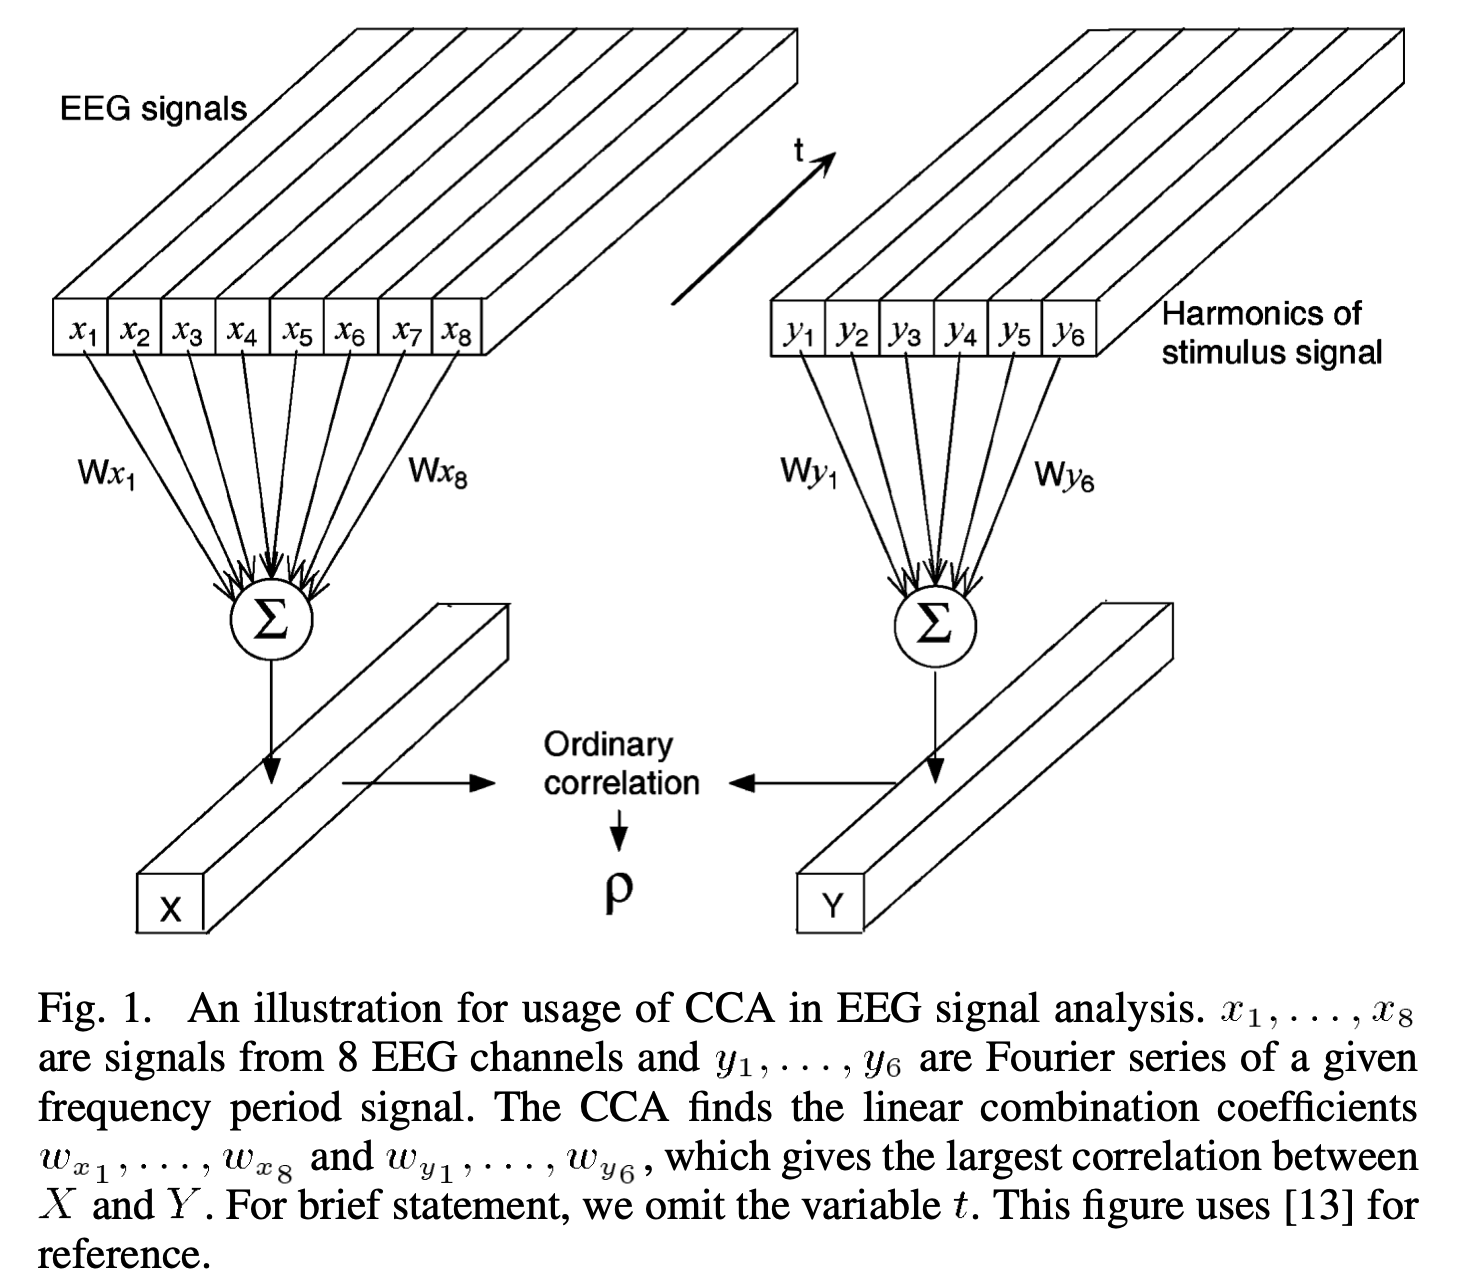

In [0]:
Image(folder_path+'All_picture/cca_picture.png', width=700)

In [32]:
# สลับ dimension ของ training และ testing data
X_train_sw = np.swapaxes(X_train_ds,1,2)
X_test_sw = np.swapaxes(X_test_ds,1,2)
print(X_train_sw.shape)

(200, 1000, 10)


In [0]:
# เปลี่ยนค่า label ที่อยู่ในรูป 1-4 ให้อยู่ในรูปแบบค่าความถี่
def convert_class_to_freq(data):
    new_label = []
    for val_class in data:
        if val_class == 1:
            new_label.append(12)
        elif val_class == 2:
            new_label.append(8.57)
        elif val_class == 3:
            new_label.append(6.67)
        else:
            new_label.append(5.45)
    return np.array(new_label)

# main code for converting classes
y_train_cf = convert_class_to_freq(y_train)
y_test_cf = convert_class_to_freq(y_test)

In [0]:
# CCA constant
PI = np.pi
sampling_frequency = 250
candidate_frequency = [5.45, 6.67, 8.57, 12]
reference_signal_phase = 0

In [0]:
# Generate Reference Frequency
sin = lambda f, h, t, p: np.sin(2*PI*f*h*t + p)
cos = lambda f, h, t, p: np.cos(2*PI*f*h*t + p)
ref_wave = lambda f, h, t, p: [sin(f, h, t, p), cos(f, h, t, p)]

def generate_reference_signal_at_time(f, t, max_harmonic, phase):
    values = []
    for h in range(1, max_harmonic + 1):
        values += ref_wave(f, h, t, phase)
    return values

def generate_reference_signal(frequency, sampling_frequency, total_time, max_harmonic, phase):
    ref_signal = []
    num_time_step = total_time * sampling_frequency
    for step in range(num_time_step):
        time = step * 1/sampling_frequency
        ref_signal_at_t = generate_reference_signal_at_time(frequency, time, max_harmonic, phase)
        ref_signal.append(ref_signal_at_t)
    return ref_signal

In [0]:
# Solve for Maximum CCA from two multidimensional signal
def find_maximum_canonical_correlations(X, Y):
    if X.shape[0] == Y.shape[0]:
        N = X.shape[0]
    else:
        print('time frame is not equal')
        return None
    C_xx = 1/N * (X.T @ X)
    C_yy = 1/N * (Y.T @ Y)
    C_xy = 1/N * (X.T @ Y)
    C_yx = 1/N * (Y.T @ X)
    C_xx_inv = np.linalg.pinv(C_xx)
    C_yy_inv = np.linalg.pinv(C_yy)
    eig_values, eig_vectors = scipy.linalg.eig(C_yy_inv @ C_yx @ C_xx_inv @ C_xy)
    sqrt_eig_values = np.sqrt(eig_values)
    return max(sqrt_eig_values)

In [0]:
# Generate Reference Data
ref_signal = {}
for frequency in candidate_frequency:
    signal = generate_reference_signal(
            frequency=frequency,
            sampling_frequency=250,
            total_time=4,
            max_harmonic=3,
            phase=reference_signal_phase
    )
    ref_signal[frequency] = pd.DataFrame(signal)

In [0]:
def classify_cca(input_data, ref_signal, actual_freq):
    input_signal = pd.DataFrame(input_data)
    max_cca = {}
    for ref_signal_key in ref_signal.keys():
        value = find_maximum_canonical_correlations(input_signal, ref_signal[ref_signal_key])
        if value.imag == 0.0:
            value = value.real
        else:
            value = None
        max_cca[ref_signal_key] = value
    max_cca["result"] = max(max_cca.items(), key = lambda x: x[1])[0]
    max_cca["actual_freq"] = actual_freq
    return max_cca

In [0]:
result = {}
result['training'] = []
result['testing'] = []
for window_index in range(X_train_bf.shape[0]):
    result['training'].append(
        classify_cca(X_train_sw[window_index,:,:], ref_signal, y_train_cf[window_index])
    )
    result['testing'].append(
        classify_cca(X_test_sw[window_index,:,:], ref_signal, y_test_cf[window_index])
    )
training_result = pd.DataFrame(result['training'])
testing_result = pd.DataFrame(result['testing'])

In [41]:
print("Result from training data of subject", subject)
sum_correct = np.sum(training_result['result'] == training_result["actual_freq"])
acc_tr = sum_correct / len(training_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(training_result['result'])))
print("The accuracy is:", acc_tr)
training_result

Result from training data of subject 20
Correct frequencies: 187 from total: 200
The accuracy is: 0.935


,5.45,6.67,8.57,12,result,actual_freq
0,0.207284,0.418107,0.145168,0.169656,6.67,6.67
1,0.240292,0.137153,0.535680,0.138722,8.57,8.57
2,0.195996,0.367759,0.153931,0.145648,6.67,6.67
3,0.508063,0.157989,0.229504,0.172331,5.45,5.45
4,0.199938,0.319814,0.177434,0.143569,6.67,6.67
...,...,...,...,...,...,...
195,0.225554,0.158384,0.526428,0.157361,8.57,8.57
196,0.303257,0.365794,0.149347,0.126561,6.67,6.67
197,0.210966,0.204091,0.311902,0.585406,12.00,12.00
198,0.156316,0.190344,0.402651,0.117683,8.57,8.57


In [42]:
print("Result from testing data of subject", subject)
sum_correct = np.sum(testing_result['result'] == testing_result["actual_freq"])
acc_tr = sum_correct / len(testing_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(testing_result['result'])))
print("The accuracy is:", acc_tr)
testing_result

Result from testing data of subject 20
Correct frequencies: 191 from total: 200
The accuracy is: 0.955


,5.45,6.67,8.57,12,result,actual_freq
0,0.160907,0.366754,0.135443,0.142338,6.67,6.67
1,0.456186,0.135680,0.153960,0.184742,5.45,5.45
2,0.447221,0.157488,0.180851,0.131848,5.45,5.45
3,0.223028,0.176130,0.389462,0.128507,8.57,8.57
4,0.237103,0.117694,0.350023,0.167571,8.57,8.57
...,...,...,...,...,...,...
195,0.153150,0.192636,0.773656,0.216382,8.57,8.57
196,0.454016,0.127791,0.187669,0.114185,5.45,5.45
197,0.133061,0.139297,0.288945,0.741645,12.00,12.00
198,0.251360,0.191726,0.472435,0.144772,8.57,8.57


### การ visualize frequency domain (Power Spectral Density based Analysis: PSDA, classical method) ของ สัญญาณ SSVEP เพื่อยืนยันผลที่ได้จาก CCA

The_frequency_which_is_the_highest_power:  13.25


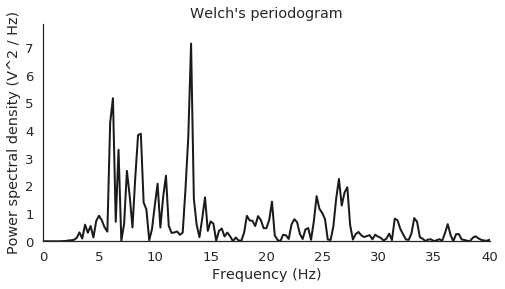

In [43]:
import seaborn as sns
from scipy import signal
sns.set(font_scale=1.2)
# Define window length (4 seconds)
win = 4 * 250
freqs, psd = signal.welch(X_train_bf[0,8,:], 250, nperseg=win)
print("The_frequency_which_is_the_highest_power: ", freqs[np.argmax(psd)])
# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 40])
sns.despine()

## 6. ข้อเสียของ frequency recognition algorithm (CCA)

- ในด้านการนำสัญญาณ SSVEP และการตรวจจับความถี่ด้วย CCA ไปใช้งานเพื่อควบคุมระบบหุ่นยนต์นั้น โดยทั่วไปแล้วแต่ละรอบคำสั่งจะทำการวิเคราะห์สัญญาณ SSVEP ที่ความยาวประมาณ 1 วินาทีเท่านั้น เพื่อให้ระบบเข้าใกล้รูปแบบ online
- ดังนั้นการใช้เทคนิค CCA ในการตรวจจับความถี่สัญญาณ SSVEP ความยาว 1 วินาทีต่อรอบคำสั่ง ส่งผลให้ประสิทธิภาพของ CCA ลดทอนลงไป เนื่องมาจากสัญญาณที่ถูกนำมาวิเคราะห์มีความยาวที่ค่อนข้างสั้น

### ทำความเข้าใจการทำสไลด์สัญญาณ SSVEP


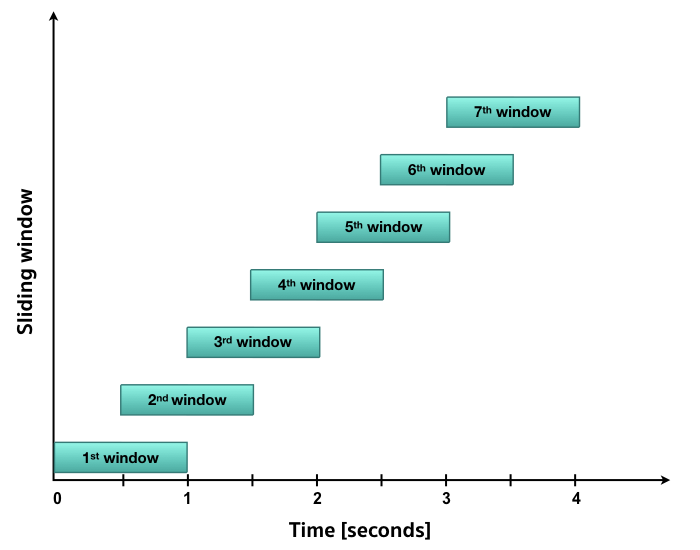

In [44]:
Image(folder_path+'All_picture/sliding_window.png', width=700)

### Note 
- เนื่องจากการทำสไลด์สัญญาณ SSVEP ทำให้จำนวน sample เพิ่มขึ้น จากเดิม 1 sample เราทำการพิจารณาความยาวของสัญญาณ SSVEP ขนาด 4 วินาที (1,000 time points) แต่หลังจากการทำสไลด์สัญญาณ SSVEP เราจะได้จำนวนเพิ่มขึ้นเป็น 7 samples และขนาดของสัญญาณ SSVEP 1 วินาที (250 time points)
- เนื่องจากจำนวน sample มีการเพิ่มขึ้น จาก 1 sample กลายเป็น 7 samples และทุกๆ sample ที่เพิ่มขึ้นก็ยังคงอยู่ใน class เดียวกัน ดังนั้นเราต้องทำการสร้าง label ใหม่ โดยต้องเพิ่มเป็น 7 เท่าจากของเดิม 

In [0]:
# TODO#3:สร้างฟังก์ชันเพื่อทำการสไลด์สัญญาณ SSVEP ให้มีความยาว 1 วินาทีต่อ sample และเลื่อนทีละ 0.5 วินาที
#################################################################################
def sliding_window(data, win_sec_len, smp_freq):

    return data_slid, num_win
#################################################################################
#                               END OF TODO#3                                   #
#################################################################################

In [0]:
# ทำการสไลด์สัญญาณ SSVEP จากความยาว 4 วินาที (1,000 time points) เป็นความยาว 1 วินาที (250 time points)
X_train_slid, _ = sliding_window(X_train_sw, 1, new_smp_freq)
X_test_slid, num_win = sliding_window(X_test_sw, 1, new_smp_freq)
print("Dimension of training set is: ", X_train_slid.shape)
print("Dimension of testing set is: ", X_test_slid.shape)
print("A number of sliding window is: ", num_win)

Dimension of training set is:  (200, 7, 250, 10)
Dimension of testing set is:  (200, 7, 250, 10)
A number of sliding window is:  7


In [0]:
# ทำการเพิ่มจำนวน labeling 
y_train_slid = np.repeat(y_train_cf[:, np.newaxis], num_win, axis=1)
y_test_slid = np.repeat(y_test_cf[:, np.newaxis], num_win, axis=1)
print("Our new labeling for training is: \n", y_train_slid)
print("\n")
print("The dimension of our new labeling for testing is: ", y_test_slid.shape)

Our new labeling for training is: 
 [[ 6.67  6.67  6.67 ...  6.67  6.67  6.67]
 [ 8.57  8.57  8.57 ...  8.57  8.57  8.57]
 [ 6.67  6.67  6.67 ...  6.67  6.67  6.67]
 ...
 [12.   12.   12.   ... 12.   12.   12.  ]
 [ 8.57  8.57  8.57 ...  8.57  8.57  8.57]
 [ 5.45  5.45  5.45 ...  5.45  5.45  5.45]]


The dimension of our new labeling for testing is:  (200, 7)


In [0]:
# ทำการแปลง dimension ของ training data และ testing data โดยพิจารณาทุก sliding window เป็น 1 sample
# Training set
X_train_new = X_train_slid.reshape(-1, X_train_slid.shape[2], X_train_slid.shape[3]) 
y_train_new = y_train_slid.reshape(-1)

# Testing set
X_test_new = X_test_slid.reshape(-1, X_test_slid.shape[2], X_test_slid.shape[3]) 
y_test_new = y_test_slid.reshape(-1)

print("=== Checking dimension of training and testing data ===")
print("\n ...")
print("Dimension of training data: ", X_train_new.shape)
print("Dimension of label of training data: ", y_train_new.shape)
print("\n ...")
print("Dimension of testing data: ", X_test_new.shape)
print("Dimension of label of testing data: ", y_test_new.shape)

=== Checking dimension of training and testing data ===

 ...
Dimension of training data:  (1400, 250, 10)
Dimension of label of training data:  (1400,)

 ...
Dimension of testing data:  (1400, 250, 10)
Dimension of label of testing data:  (1400,)


## ใช้ CCA เพื่อทำการตรวจความถี่อีกครั้ง

In [0]:
# Generate Reference Data
ref_signal_part2 = {}
for frequency2 in candidate_frequency:
    signal2 = generate_reference_signal(
            frequency=frequency2,
            sampling_frequency=250,
            total_time=1,
            max_harmonic=6,
            phase=reference_signal_phase
    )
    ref_signal_part2[frequency2] = pd.DataFrame(signal2)

In [0]:
# Perform CCA to detect the target SSVEP frequency
result_part2 = {}
result_part2['training'] = []
result_part2['testing'] = []
for idx_sample in range(X_train_new.shape[0]):
    result_part2['training'].append(
        classify_cca(X_train_new[idx_sample,:,:], ref_signal_part2, y_train_new[idx_sample])
    )
    result_part2['testing'].append(
        classify_cca(X_test_new[idx_sample,:,:], ref_signal_part2, y_test_new[idx_sample])
    )
training_result = pd.DataFrame(result_part2['training'])
testing_result = pd.DataFrame(result_part2['testing'])

In [0]:
print("Result from training data after using sliding window size 1 secs with 50% overlap of subject", subject)
sum_correct = np.sum(training_result['result'] == training_result["actual_freq"])
acc_tr = sum_correct / len(training_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(training_result['result'])))
print("The accuracy is:", acc_tr)
training_result

Result from training data after using sliding window size 1 secs with 50% overlap of subject 20
Correct frequencies: 918 from total: 1400
The accuracy is: 0.6557142857142857


,5.45,6.67,8.57,12,result,actual_freq
0,0.464108,0.545682,0.493576,0.527872,6.67,6.67
1,0.557189,0.635153,0.426675,0.502530,6.67,6.67
2,0.480877,0.599609,0.344703,0.406079,6.67,6.67
3,0.395189,0.538919,0.568582,0.471536,8.57,6.67
4,0.447171,0.560056,0.463797,0.345653,6.67,6.67
...,...,...,...,...,...,...
1395,0.717602,0.586332,0.744681,0.431958,8.57,5.45
1396,0.614937,0.581888,0.624110,0.398694,8.57,5.45
1397,0.539461,0.524003,0.614339,0.328506,8.57,5.45
1398,0.524574,0.507384,0.668827,0.430370,8.57,5.45


In [0]:
print("Result from testing data after using sliding window size 1 secs with 50% overlap of subject", subject)
sum_correct = np.sum(testing_result['result'] == testing_result["actual_freq"])
acc_tr = sum_correct / len(testing_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(testing_result['result'])))
print("The accuracy is:", acc_tr)
testing_result

Result from testing data after using sliding window size 1 secs with 50% overlap of subject 20
Correct frequencies: 984 from total: 1400
The accuracy is: 0.7028571428571428


,5.45,6.67,8.57,12,result,actual_freq
0,0.455350,0.476669,0.395812,0.325479,6.67,6.67
1,0.368325,0.419993,0.443156,0.411597,8.57,6.67
2,0.348168,0.499280,0.391511,0.325864,6.67,6.67
3,0.329657,0.435003,0.375103,0.400832,6.67,6.67
4,0.352488,0.481604,0.328028,0.373375,6.67,6.67
...,...,...,...,...,...,...
1395,0.611642,0.400374,0.683788,0.271835,8.57,5.45
1396,0.565137,0.440891,0.692251,0.435756,8.57,5.45
1397,0.714835,0.403942,0.511749,0.355306,5.45,5.45
1398,0.675072,0.438228,0.585126,0.339138,5.45,5.45


In [0]:
# display(Markdown(f'### Result from training data after using sliding window size 1 secs with 50% overlap'))
# display(Markdown(f'#### Person #{subject}'))
# sum_correct = np.sum(training_result['result'] == training_result["actual_freq"])
# acc_tr = sum_correct / len(training_result['result'].values)
# display(Markdown(f"Correctly classify {sum_correct} / {len(training_result['result'].values)}"))
# display(Markdown(f"Accuracy {acc_tr}"))
# training_result

In [0]:
# display(Markdown(f'### Result from testing data after using sliding window size 1 secs with 50% overlap'))
# display(Markdown(f'#### Person #{subject}'))
# sum_correct = np.sum(testing_result['result'] == testing_result["actual_freq"])
# acc_tr = sum_correct / len(testing_result['result'].values)
# display(Markdown(f"Correctly classify {sum_correct} / {len(testing_result['result'].values)}"))
# display(Markdown(f"Accuracy {acc_tr}"))
# testing_result

## 6. การใช้ machine learning model อย่างง่าย ในการแยกความถี่ของสัญญาณ SSVEP

### - ต้องทำการลดขนาดของจำนวนมิติของทั้ง training และ testing data (Dimensionality Reduction) เนื่องจากทั้งสองข้อมูลมีจำนวนมิติถึง 10 มิติ ทำให้ใช้เวลานานในการ training และอาจจะมีการปนของ noise อยู่มาก ดังนั้นการลดจำนวนมิติของข้อมูลจะช่วยทำให้ feature ที่เราสนใจโดดเด่นขึ้นมา ทำให้ clasifier ทำงานได้อย่างมีประสิทธิภาพดียื่งขึ้น

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

- ก่อนการทำ LDA เราต้องทำการเตรียมข้อมูลให้อยู่ในรูป 2 มิติก่อน (samples, features) ในที่นี้เราจะทำการหาค่าเฉลี่ยของ 1 เส้น time serie เพื่อเป็นตัวแทนของ time serie นั้น

In [0]:
# Dara preparation for performing LDA
X_train_swb = np.swapaxes(X_train_new,1,2)
X_test_swb = np.swapaxes(X_test_new,1,2)
print("The shape of training", X_train_swb.shape)
print("The shape of testing", X_test_swb.shape)

The shape of training (1400, 10, 250)
The shape of testing (1400, 10, 250)


In [0]:
# การใช้ label ควรใช้ในรูปแบบ class 0,1,2,3 
y_train_final = (np.repeat(y_train[:, np.newaxis], num_win, axis=1).reshape(-1))-1
y_test_final = (np.repeat(y_test[:, np.newaxis], num_win, axis=1).reshape(-1))-1
print(y_train_final)
print(y_test_final.shape)

[2 2 2 ... 3 3 3]
(1400,)


In [0]:
# สามารถปรับเปลี่ยน n_components ได้
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train_swb.reshape(X_train_swb.shape[0], -1), y_train_final)
X_test_lda = lda.transform(X_test_swb.reshape(X_test_swb.shape[0], -1))
print(X_train_lda.shape)
print(X_test_lda.shape)

(1400, 3)
(1400, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [0]:
from sklearn.model_selection import train_test_split
X_val_split, X_test_split, y_val_split, y_test_split = train_test_split(X_test_lda, y_test_final, test_size=0.5, 
                                               shuffle = True, random_state=0, stratify = y_test_final)
print("Dimension of validation data is: ", X_val_split.shape)
print("Dimension of validation label is: ", y_val_split.shape)
print("\n")
print("Dimension of testing data is: ", X_test_split.shape)
print("Dimension of testing label is: ", y_test_split.shape)

Dimension of validation data is:  (700, 3)
Dimension of validation label is:  (700,)


Dimension of testing data is:  (700, 3)
Dimension of testing label is:  (700,)


In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3],
                     'C': [0.10, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3],
                     'C': [0.10, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'gamma' : ['auto'], 'C': [0.10, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['poly'],  'gamma': [1e-2, 1e-3], 'C': [0.10, 0.1, 1, 10, 100, 1000], 'degree': [0,1,2,3,4,5]}]

# Using Grid serach algorithm to find
kfolds = StratifiedKFold(10)
clf = GridSearchCV(SVC(), tuned_parameters, cv=kfolds.split(X_train_lda, y_train_final), scoring = 'accuracy')
clf.fit(X_train_lda, y_train_final)

# Clasifying with an optimal parameter set
Optimal_params = clf.best_params_
print(Optimal_params)
classifer = SVC(**Optimal_params)
classifer.fit(X_train_lda, y_train_final)
print(classifer.score(X_test_split, y_test_split))

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.5185714285714286


### ข้อเสียของ Grid search
- ???

In [0]:
list_C = [0.001,0.01,0.10, 0.1, 1, 10, 100, 1000]
list_gamma = ['auto', 1e-2, 1e-3, 1e-4]
list_kernel = ['linear', 'sigmoid', 'rbf']

#################################################################################
# TODO#4: ให้หา optimal hyperpameters set โดยใช้ validation set เป็นตัวประเมินความถูกต้องของตัว SVM โมเดล
#################################################################################
clf = SVC(kernel=best_kernel, gamma = best_gamma,  C= best_C)
clf.fit(X_train_lda, y_train_final)
print(clf.score(X_test_split, y_test_split))
#################################################################################
#                               END OF TODO#4                                   #
#################################################################################

The best C value is: 0.001 The best gamma is: auto The best Kernel:linear The best accuracy: 0.5385714285714286
The best C value is: 0.01 The best gamma is: auto The best Kernel:linear The best accuracy: 0.5414285714285715
The best C value is: 1 The best gamma is: 0.01 The best Kernel:rbf The best accuracy: 0.5457142857142857
0.5242857142857142


# ***--- See ya!!! At LAB 2 ---***